In [9]:
import os

date = "20240915"  # Example date
hour = "00z"

s3_path_template = "s3://ecmwf-forecasts/{date}/{hour}/ifs/0p25/oper/"
# Download
s3_path = s3_path_template.format(date=date, hour=hour)
# Save to current dir

current_dir = os.getcwd()
print(f"Current dir: {current_dir}")
print(s3_path)

Current dir: /home/benjamin/Code/rs/gribwork/gribberish/python/examples
s3://ecmwf-forecasts/20240915/00z/ifs/0p25/oper/


In [13]:
import xarray as xr
import numpy as np
import pandas as pd

print(s3_path)

ds = xr.open_mfdataset(
    #f"{s3_path}20240915000000-0h-oper-fc.grib2",
    # ["../../testdata/t1.grib2"],
    [f"{s3_path}20240915000000-0h-oper-fc.grib2"],
    # f,
    engine="gribberish",
    cache=True,
    decode_cf=True,
    #engine="cfgrib",
    #chunks="auto",


    # combine="nested", 
    # coords="minimal", 
    # compat="override", 
    # concat_dim="time", 
    drop_variables=["depthBelowLandLayer", "isobar", "heightAboveGround", "isobaric surface"]
    #storage_options={"anon": True},
    #chunks={},
)
ds

s3://ecmwf-forecasts/20240915/00z/ifs/0p25/oper/


/home/benjamin/Code/rs/gribwork/gribberish/python/gribberish/gribberish_backend.py:50: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  return xr.Dataset(


<xarray.Dataset> Size: 839MB
Dimensions:               (time: 1, hag: 2, latitude: 721, longitude: 1440,
                           isobar: 13)
Coordinates:
  * time                  (time) datetime64[ns] 8B 2024-09-15
  * isobar                (isobar) float64 104B 5e+03 1e+04 ... 9.25e+04 1e+05
  * hag                   (hag) float64 16B 10.0 100.0
  * latitude              (latitude) float64 6kB 90.0 89.75 ... -89.75 -90.0
  * longitude             (longitude) float64 12kB 180.0 180.2 ... 539.5 539.8
Data variables: (12/15)
    ugrd_UGRDhag_fcst     (time, hag, latitude, longitude) float64 17MB dask.array<chunksize=(1, 2, 721, 1440), meta=np.ndarray>
    relv                  (time, isobar, latitude, longitude) float64 108MB dask.array<chunksize=(1, 13, 721, 1440), meta=np.ndarray>
    rh                    (time, isobar, latitude, longitude) float64 108MB dask.array<chunksize=(1, 13, 721, 1440), meta=np.ndarray>
    vgrd_VGRDisobar_fcst  (time, isobar, latitude, longitude) float64 108MB dask.array<chunksize=(1, 13, 721, 1440), meta=np.ndarray>
    pres_PRESmsl_fcst     (time, latitude, longitude) float64 8MB dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    vgrd_VGRDhag_fcst     (time, hag, latitude, longitude) float64 17MB dask.array<chunksize=(1, 2, 721, 1440), meta=np.ndarray>
    ...                    ...
    tmp_TMPisobar_fcst    (time, isobar, latitude, longitude) float64 108MB dask.array<chunksize=(1, 13, 721, 1440), meta=np.ndarray>
    pres_PRESsfc_fcst     (time, latitude, longitude) float64 8MB dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    hgt                   (time, isobar, latitude, longitude) float64 108MB dask.array<chunksize=(1, 13, 721, 1440), meta=np.ndarray>
    land                  (time, latitude, longitude) float64 8MB dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    tmp_TMPhag_fcst       (time, latitude, longitude) float64 8MB dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    spfh                  (time, isobar, latitude, longitude) float64 108MB dask.array<chunksize=(1, 13, 721, 1440), meta=np.ndarray>
Attributes:
    meta:     Generated with gribberishpy

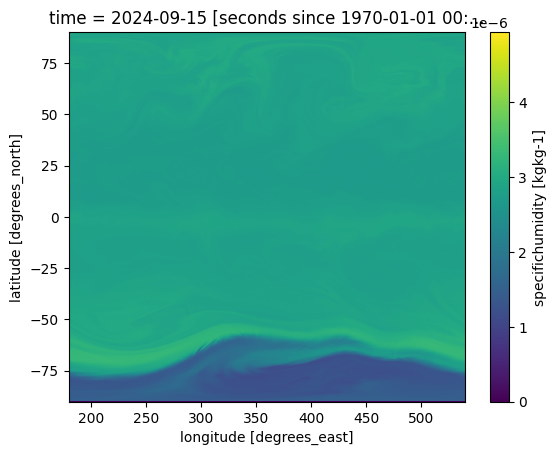

In [14]:
ds["spfh"].isel(time=0, isobar=0).plot(x="longitude", y="latitude")